In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model
from model import Net
import utils
import matplotlib.pyplot as plt


In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [3]:
batch_size = 512 # defined Batch size for processing image in one go
shuffle = True  
pin_memory = True
num_workers = 2
train_data = model.train_data()
test_data = model.test_data()
train_loader = model.get_train_loader(batch_size,shuffle,num_workers,pin_memory,train_data)
test_loader = model.get_train_loader(batch_size,shuffle,num_workers,pin_memory,test_data)

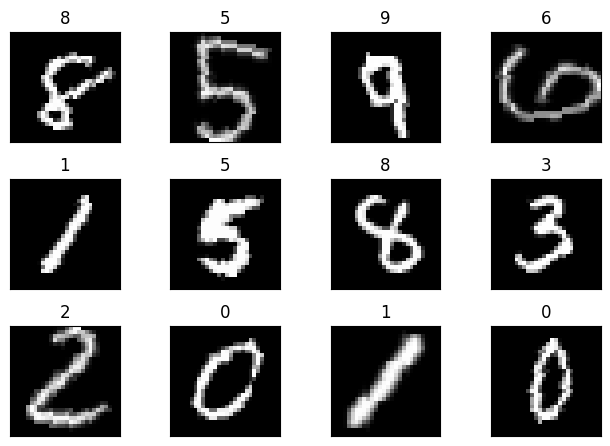

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()#it is Matlab function for creating a new blank canvas for creating input and getting output on the x and y axis

for i in range(12):
  plt.subplot(3,4,i+1)#this allows you to creat subplots withing large or main figurs
  plt.tight_layout()# it is used for adjusting the subplot parameters to make suare that all plot elements fit nicely
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')# This code takes the image from batch data and squeeze removes the first dimensions which are batch data, and coverts the batch data into the single image and Cmap specifies the colormap, that will use in displaying the image
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
#!pip install torchsummary #installing the torchsummary
from torchsummary import summary #imporing the summary function from torchsummary
use_cuda = torch.cuda.is_available()#checking the cuda is available
device = torch.device("cuda" if use_cuda else "cpu") #if cuda is not avail then use the cpu
model = Net().to(device)
summary(model, input_size=(1, 28, 28))#creat the summary of the model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [7]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion)
  utils.test(model, device, test_loader, criterion)
  scheduler.step()
train_acc,train_losses = utils.train(model, device, train_loader, optimizer, criterion)
test_acc,test_losses = utils.test(model, device, test_loader, criterion)

d:\ERA V2\ERA Rinkal Virtual enviroment\myenv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.5122 Batch_id=117 Accuracy=39.87: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.5781, Accuracy: 7962/10000 (79.62%)

Epoch 2


Train: Loss=0.2541 Batch_id=117 Accuracy=90.36: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.1393, Accuracy: 9579/10000 (95.79%)

Epoch 3


Train: Loss=0.1291 Batch_id=117 Accuracy=95.24: 100%|██████████| 118/118 [01:50<00:00,  1.07it/s]


Test set: Average loss: 0.0806, Accuracy: 9748/10000 (97.48%)

Epoch 4


Train: Loss=0.0447 Batch_id=117 Accuracy=96.59: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.0551, Accuracy: 9831/10000 (98.31%)

Epoch 5


Train: Loss=0.0510 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0478, Accuracy: 9855/10000 (98.55%)

Epoch 6


Train: Loss=0.0603 Batch_id=117 Accuracy=97.55: 100%|██████████| 118/118 [01:49<00:00,  1.08it/s]


Test set: Average loss: 0.0470, Accuracy: 9854/10000 (98.54%)

Epoch 7


Train: Loss=0.0490 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [01:54<00:00,  1.03it/s]


Test set: Average loss: 0.0387, Accuracy: 9876/10000 (98.76%)

Epoch 8


Train: Loss=0.0581 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0329, Accuracy: 9887/10000 (98.87%)

Epoch 9


Train: Loss=0.0163 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [01:49<00:00,  1.07it/s]


Test set: Average loss: 0.0342, Accuracy: 9895/10000 (98.95%)

Epoch 10


Train: Loss=0.0182 Batch_id=117 Accuracy=98.48: 100%|██████████| 118/118 [01:49<00:00,  1.07it/s]


Test set: Average loss: 0.0355, Accuracy: 9884/10000 (98.84%)

Epoch 11


Train: Loss=0.0284 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0286, Accuracy: 9897/10000 (98.97%)

Epoch 12


Train: Loss=0.0334 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [01:51<00:00,  1.06it/s]


Test set: Average loss: 0.0327, Accuracy: 9881/10000 (98.81%)

Epoch 13


Train: Loss=0.0150 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [01:50<00:00,  1.07it/s]


Test set: Average loss: 0.0259, Accuracy: 9912/10000 (99.12%)

Epoch 14


Train: Loss=0.0417 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [01:46<00:00,  1.11it/s]


Test set: Average loss: 0.0238, Accuracy: 9917/10000 (99.17%)

Epoch 15


Train: Loss=0.0325 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [01:50<00:00,  1.07it/s]


Test set: Average loss: 0.0247, Accuracy: 9913/10000 (99.13%)

Epoch 16


Train: Loss=0.0405 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [01:50<00:00,  1.07it/s]


Test set: Average loss: 0.0210, Accuracy: 9923/10000 (99.23%)

Epoch 17


Train: Loss=0.0286 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0200, Accuracy: 9924/10000 (99.24%)

Epoch 18


Train: Loss=0.0533 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [01:53<00:00,  1.04it/s]


Test set: Average loss: 0.0201, Accuracy: 9929/10000 (99.29%)

Epoch 19


Train: Loss=0.0058 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [01:52<00:00,  1.04it/s]


Test set: Average loss: 0.0200, Accuracy: 9924/10000 (99.24%)

Epoch 20


Train: Loss=0.0225 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0196, Accuracy: 9926/10000 (99.26%)



Train: Loss=0.0664 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [01:52<00:00,  1.05it/s]


Test set: Average loss: 0.0199, Accuracy: 9924/10000 (99.24%)



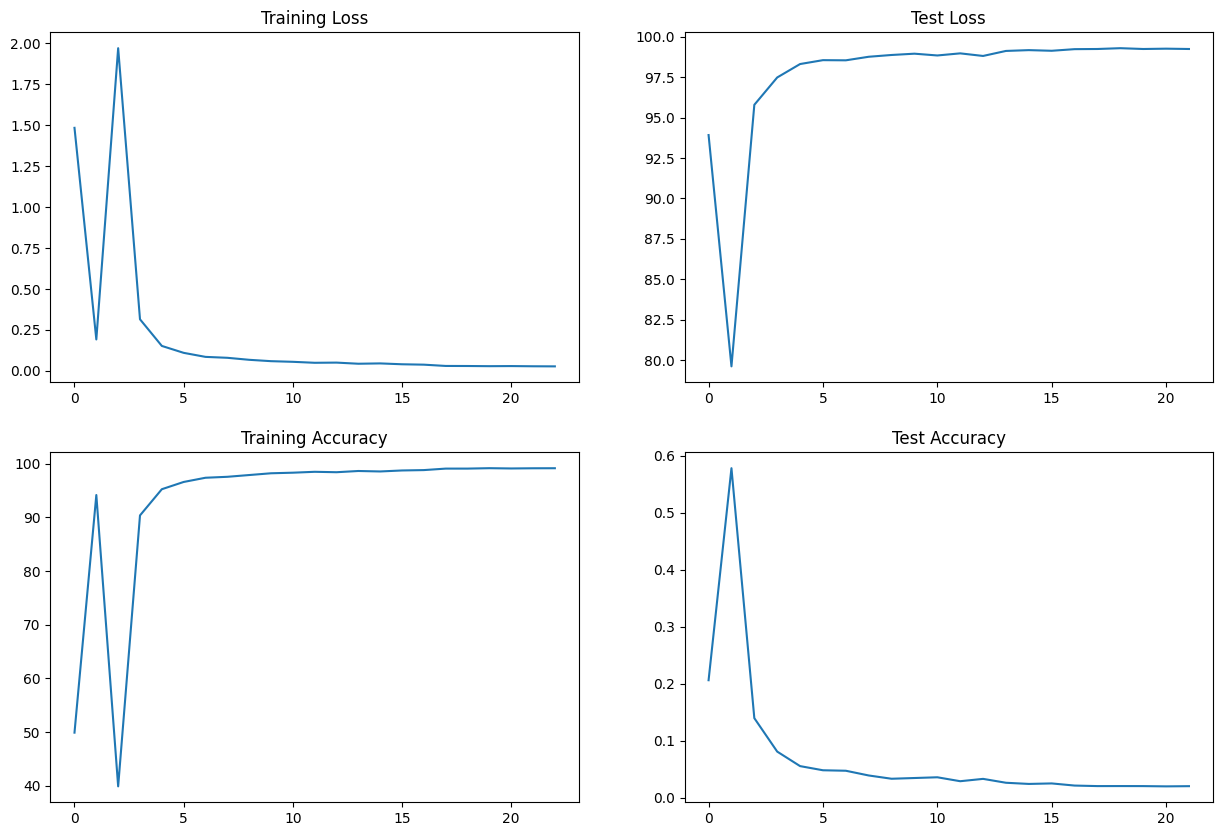

In [8]:
utils.plot_loss_accuracy(train_losses,train_acc,test_losses,test_acc)